In [58]:
import numpy as np
import functions as f
from gradient import numerical_gradient
import pickle

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 初始化权重
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = f.relu(a1)
        #z1 = np.tanh(a1)
        a2 = np.dot(z1, W2) + b2
        #y = f.softmax(a2)                    # 分类任务
        y = a2         # 拟合 
        
        return y
        
    # x:输入数据, t:监督数据
    def loss(self, x, t):
        y = self.predict(x)
        
        #return f.cross_entropy_error(y, t) # 分类
        return f.mean_squared_error(y, t)  # 拟合
    
    # 分类测精度
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:输入数据, t:监督数据
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

    # 保存权重文件    
    def save(self,path):
        with open(path,'wb') as f :
            pickle.dump(self.params, f)

    # 导入权重文件
    def load(self,path):
        with open(path,'rb') as f :
            self.params = pickle.load(f)
        #print(weight)
        #print(self.params)


    

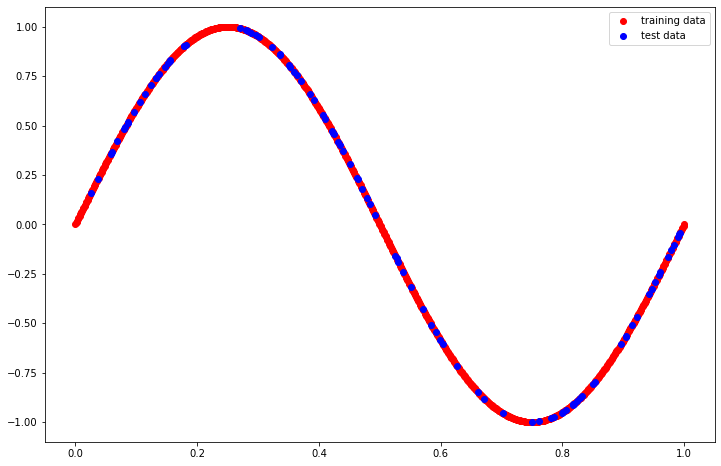

In [77]:
import matplotlib.pyplot as plt

object_fun = lambda x: np.sin(2*np.pi*x)
number_of_data = 1000
training_data_ratio = 0.9
test_data_ratio = 1-training_data_ratio
X_total = np.linspace(0,1,number_of_data)
X_total = X_total.reshape(-1,1)
Y_total = object_fun(X_total)

#plt.plot(X_total, Y_total,color='k',LineWidth=2)


# 打乱标签
id = [i for i in range(len(X_total))]
np.random.shuffle(id)
X_total = X_total[id]
Y_total = Y_total[id]

X_train = X_total[0:int(number_of_data*training_data_ratio)]
Y_train = Y_total[0:int(number_of_data*training_data_ratio)]

X_test = X_total[-int(number_of_data*test_data_ratio):]
Y_test = Y_total[-int(number_of_data*test_data_ratio):]
plt.figure(figsize=(12,8))
plt.scatter(X_train,Y_train,color='r')#,marker='x',LineWidth=0)
plt.scatter(X_test,Y_test,color='b')#,marker='o',LineWidth=0)
plt.legend(["training data","test data"])
plt.show()

In [82]:
network = TwoLayerNet(input_size=1, hidden_size=80, output_size=1)

iters_num = 100000  # 适当设定循环的次数
train_size = X_train.shape[0]
batch_size = 128
learning_rate = 0.001
save_path = "weight.pickle"

train_loss_list = []
test_loss_list = []

iter_per_epoch = max(train_size / batch_size, 1)
iter_num = 100

# 尝试读取保存的权重
try:
    network.load(save_path) # 尝试读取权重
except:
    pass

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = X_train[batch_mask]
    y_batch = Y_train[batch_mask]
    
    # 计算梯度
    grad = network.numerical_gradient(x_batch, y_batch)
    
    # 更新参数
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, y_batch)
    train_loss_list.append(loss)
    loss_test = network.loss(X_test, Y_test)
    test_loss_list.append(loss_test)
    
    #if i % iter_per_epoch == 0:
    if i % iter_num == 0:
        print(f"epoch:{i}/{iters_num}")
        print("train loss, test loss | " + str(loss) + ", " + str(loss_test))
        network.save(save_path)
        

epoch:0/100000
train loss, test loss | 11.258730148127418, 7.609471593239547
epoch:100/100000
train loss, test loss | 10.98188034253003, 7.429560138321793
epoch:200/100000
train loss, test loss | 9.429135559810508, 7.7878338387065105
epoch:300/100000
train loss, test loss | 10.54275182714065, 7.576914229784104
epoch:400/100000
train loss, test loss | 9.23759550401195, 7.831116614705162
epoch:500/100000
train loss, test loss | 9.138717439126067, 7.411960153450656
epoch:600/100000
train loss, test loss | 9.637959163541124, 7.497045036058268
epoch:700/100000
train loss, test loss | 9.135385395696513, 8.064900741366472
epoch:800/100000
train loss, test loss | 9.73173151794681, 7.221812910397537
epoch:900/100000
train loss, test loss | 9.374030046173703, 7.6577125492784734
epoch:1000/100000
train loss, test loss | 9.126383918381544, 7.328758631780602
epoch:1100/100000
train loss, test loss | 9.374724668821692, 6.894692071277264
epoch:1200/100000
train loss, test loss | 10.435848666658803, 7

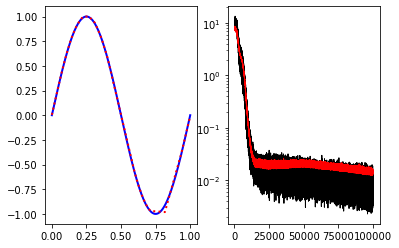

In [87]:
# 绘制图形
x_test =   np.linspace(0,1,number_of_data).reshape(-1,1)
y_test = object_fun(x_test)
y_predict = network.predict(x_test)

fig,axs = plt.subplots(1,2)
axs = axs.reshape(-1)

axs[0].plot(x_test,y_test,'b',LineWidth=2)
axs[0].plot(x_test,y_predict,':r',LineWidth=2)

axs[1].semilogy(train_loss_list,color='k',LineWidth=1)
axs[1].semilogy(test_loss_list,color='r',LineWidth=1)

plt.show()